**Name: Sohaila Mahmoud Elsayed**

**The Sparks foundation data science intern**

**Task#2:** Predict the optimum number of clusters Using Unsupervised ML(K-means) and represent it visually

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import datasets

**Loading The Data**

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print("the shape of the dataset is ",df.shape)
df.head()

the shape of the dataset is  (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


AS we see that the dataset consists of 4 featuers and the label which is the kind of the flower and 150 rows.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Visualizing The Data**

Text(0, 0.5, 'sepal width (cm)')

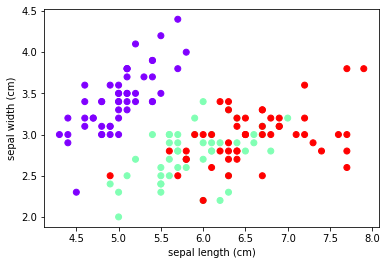

In [5]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'] ,c=iris.target,cmap='rainbow')

plt.xlabel('sepal length (cm)', fontsize=10)
plt.ylabel('sepal width (cm)', fontsize=10)

Text(0, 0.5, 'petal width (cm)')

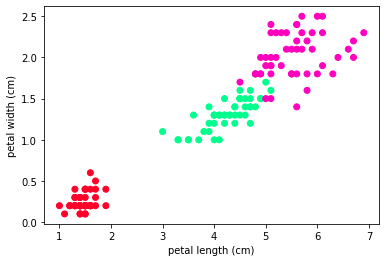

In [6]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'] ,c=iris.target,cmap='gist_rainbow')

plt.xlabel('petal length (cm)', fontsize=10)
plt.ylabel('petal width (cm)', fontsize=10)

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

 that show that we have three groups but I will use elbow method to show that graphically

**Find The Optimum Number Of Clusters for K-Means classification** using Elbow Method

In [8]:
wcss = []
no_of_clusters = range(1, 5)
for i in no_of_clusters:
  kmeans = KMeans(n_clusters = i,  init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0) 
  kmeans.fit(df.values)
  wcss.append(kmeans.inertia_)

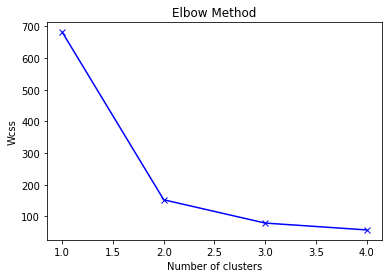

In [9]:
plt.plot(no_of_clusters, wcss, 'bx-')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()

From the above visualization, we can see that the optimal number of clusters should be 3

**Applying Kmeans to the dataset**

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(df.values)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**Visualising the clusterss**

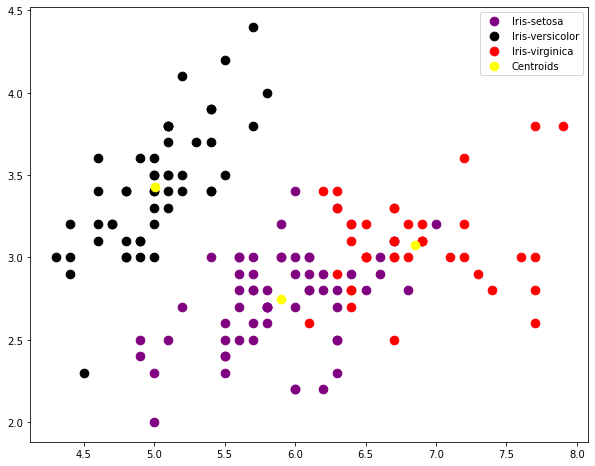

In [11]:
# Visualising the clusters - On the first two columns(sepal length , sepal width)
plt.figure(figsize= (10, 8))
# 0,0 means first cluster and first colum, 0,1 means first cluster and second column
plt.scatter(df.values[y == 0, 0], df.values[y == 0, 1], s = 75, color = 'purple', label = 'Iris-setosa') 
# 1,0 means second cluster and first colum, 1,1 means second cluster and second column
plt.scatter(df.values[y == 1, 0], df.values[y == 1, 1], s = 75, color = 'black', label = 'Iris-versicolor')
# 2,0 means third cluster and first colum, 2,1 means third cluster and second column
plt.scatter(df.values[y == 2, 0], df.values[y == 2, 1], s = 75, color = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 75, color = 'yellow', label = 'Centroids')

#describing the elements of the graph
plt.legend()